<a name = "inicio"></a>

***

<div style="font-size: 30px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Lab 2.2 Modelado de funciones y gráficos de distribuciones de probabilidad en Python</div>

<table>
  <tr>
    <td>
<div>
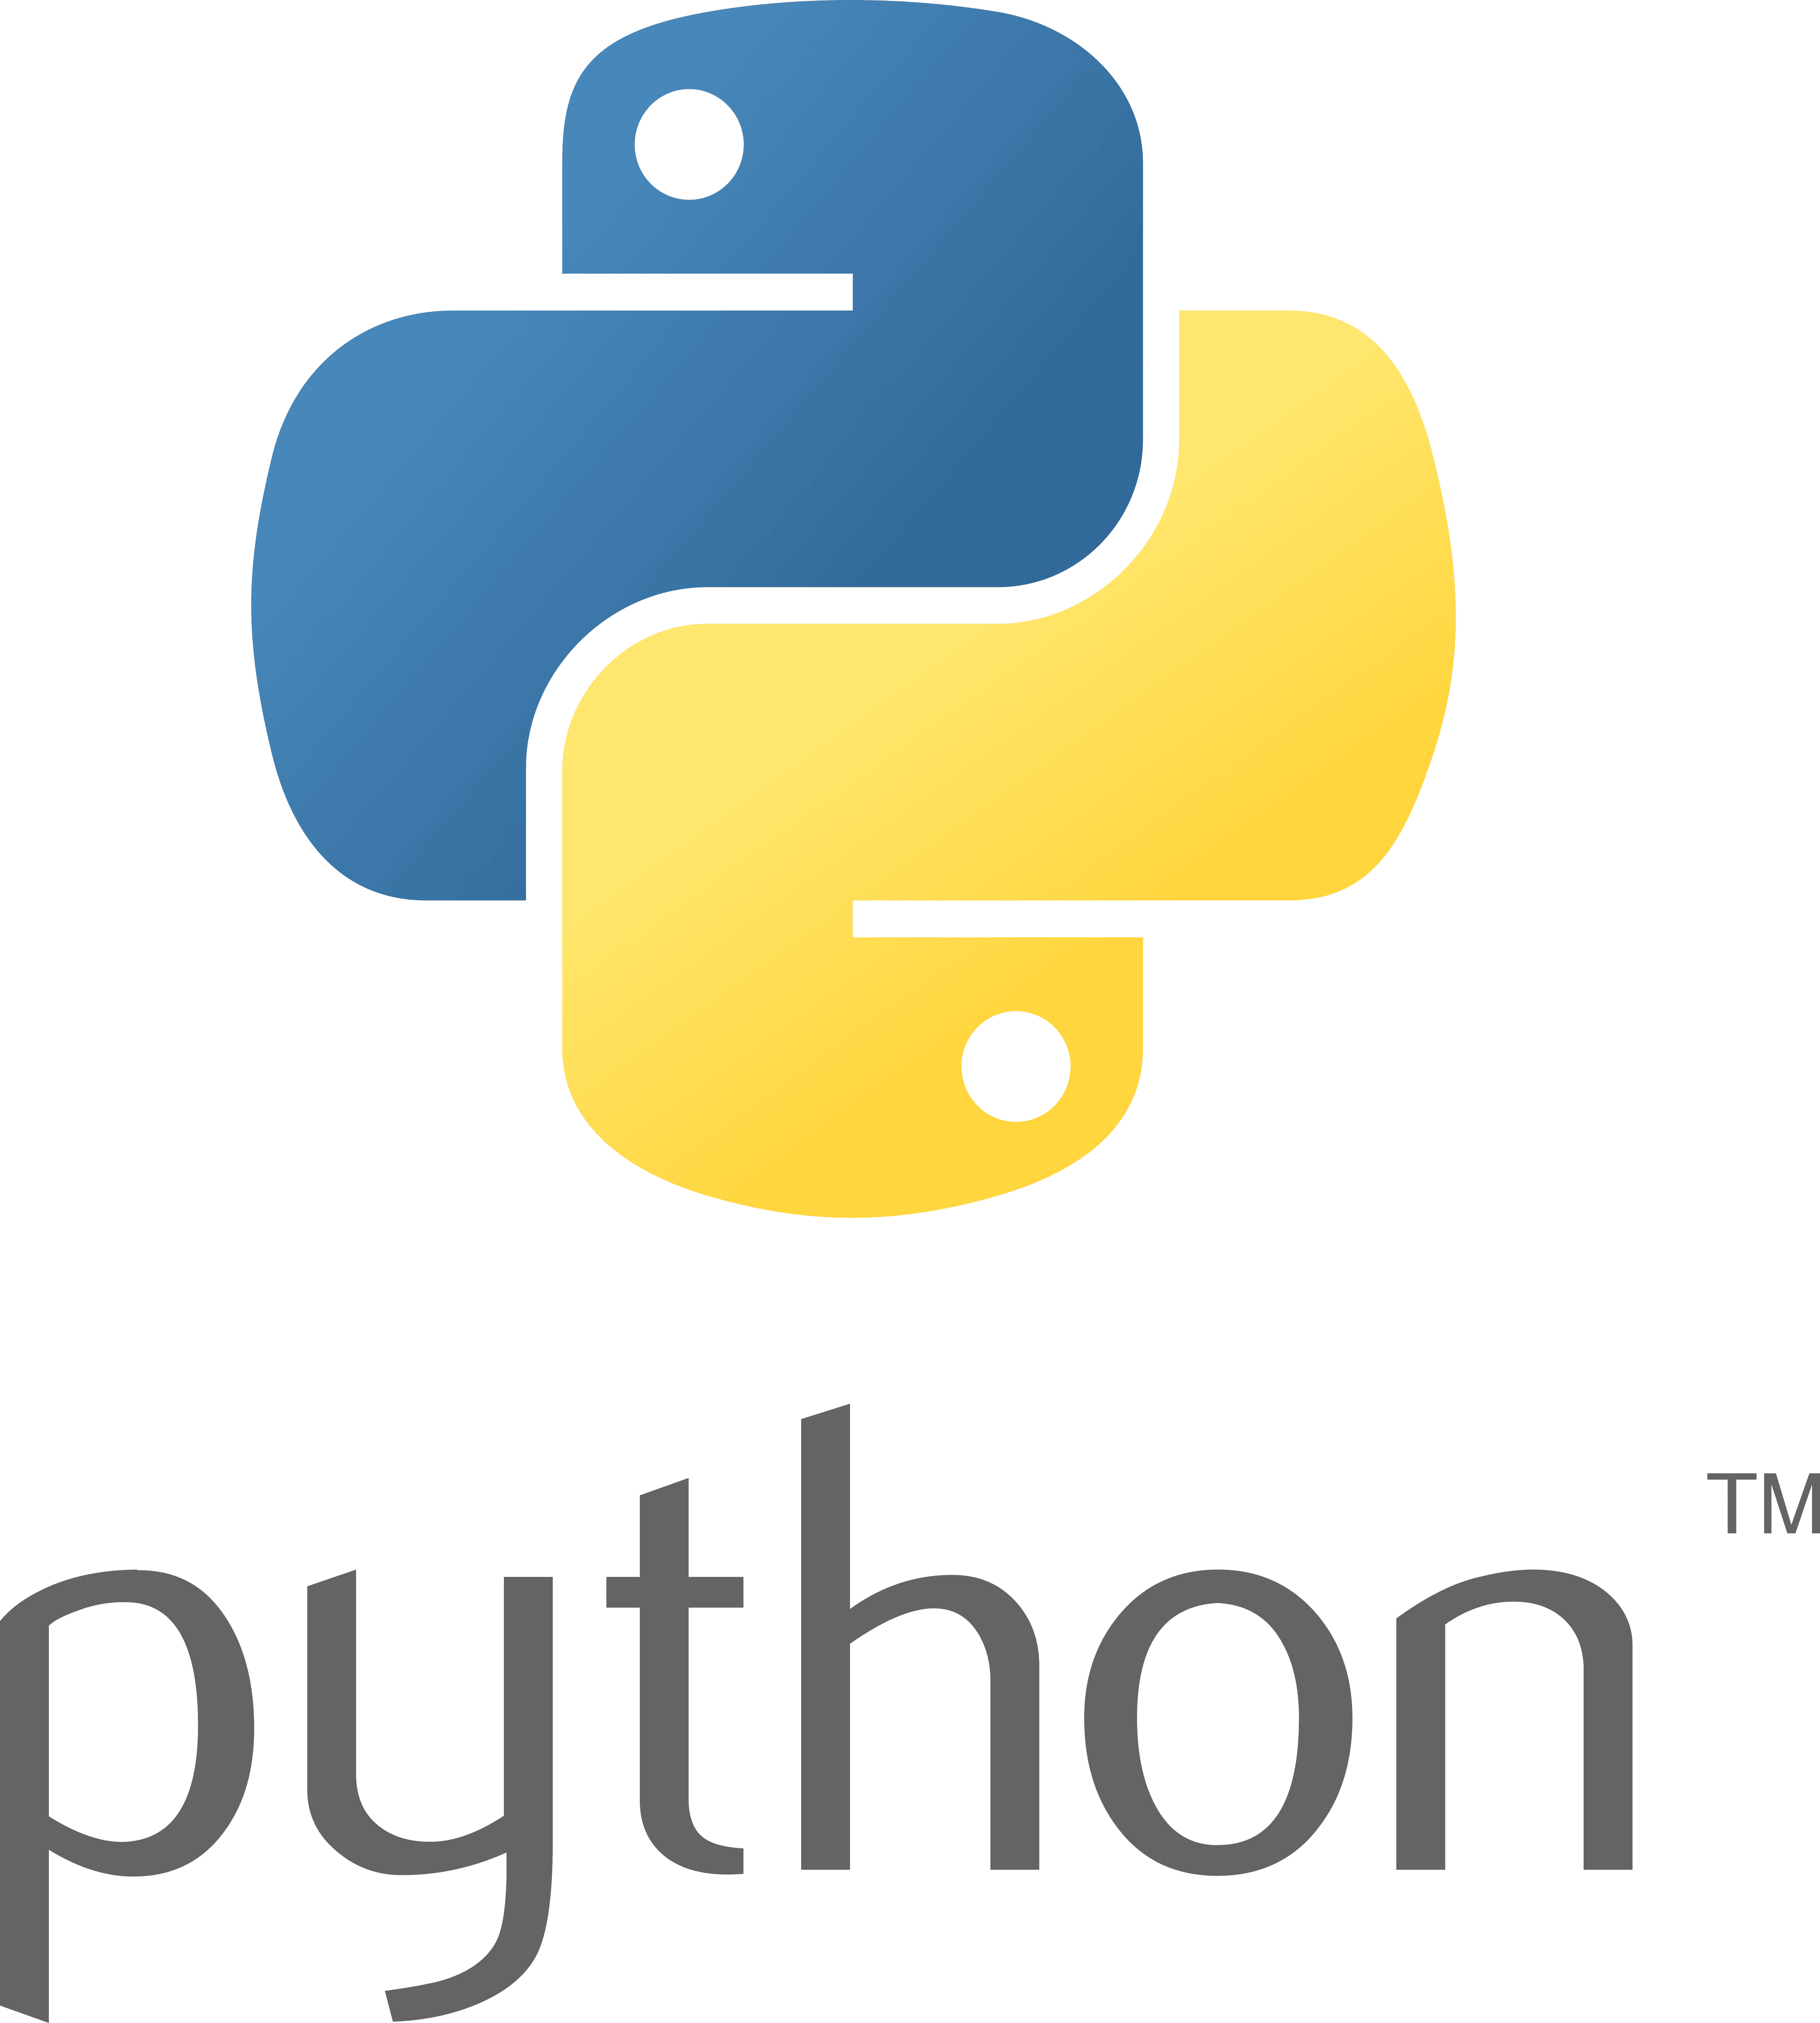
<td>&nbsp;</td><td>&nbsp;</td>
</div>
    </td>
    <td>
<div>
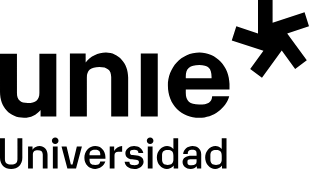
</div>       
</td>
  </tr>
<table>
    
**Nombre:**

* *Jose Auza*


***

# Instrucciones de la prueba

Este documento corresponde al **Laboratorio 2.2** que tenéis que realizar abarcando los conceptos vistos en el **Notebook 2.2**.




### Ejercicio 1

Supongamos que gestionamos una pequeña empresa que vende un producto online. Basándonos en históricos, sabemos que, en promedio, el 20% de las personas que visitan nuestro sitio web realizan una compra. Ahora, en un día particular, tenemos 500 visitantes en el sitio. Asumir que la variable aleatoria $x$ (número de compras) sigue una distribución binomial, ya que tenemos un número fijo de ensayos (500 visitantes), cada ensayo es independiente, y cada ensayo resulta en éxito (compra) con una probabilidad del 20%.

1. ¿Qué distribución de probabilidad tiene $x$? Tenéis que justificar el tipo de distribución y sus parámetros.

2. ¿Cuál es la probabilidad de tener exactamente 100 compras en un día, dado que 500 personas visitan el sitio?

3. ¿Cuál es la probabilidad de tener más de 100 compras en un día, dado que 500 personas visitan el sitio?

4. ¿Cuál es la probabilidad de tener menos de 100 compras en un día, dado que 500 personas visitan el sitio?

5. Representar gráficamente la función de masa de la variable aleatoria $x$ e interpretar los resultados.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

R\ Se tiene una distribucion Binomial ya que se tienen eventos Bernoulli independientes en cada intento con solo dos posibilidades: compra o no compra. Es decir exito o fracaso. Esta dist seria binomial con parametro p=0.2 que es la probabilidad de exito y n= 500, que son el numero de ensayos o personas que se tendran.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [9]:
#¿Cuál es la probabilidad de tener exactamente 100 compras en un día, dado que 500 personas visitan el sitio?abs
import pandas as pd
import numpy as np 
from scipy import stats as st 
from scipy.stats import binom 

binom_website = binom(n=500,p=0.2)
prob_100_compras = binom_website.pmf(100)

print(f'la probabilidad de tener exactamente 100 compras es de: {prob_100_compras*100:.2f}%')



la probabilidad de tener exactamente 100 compras es de: 4.46%


R\ se crea la dist con los parametros descritos en el pto uno y se usa pmf pq buscamos una probabilidad puntual. Masa de probabilidad

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [10]:
#¿Cuál es la probabilidad de tener más de 100 compras en un día, dado que 500 personas visitan el sitio?

prob_mas_de_100_compras= 1 - binom_website.cdf(100)
print(f'la probabilidad de tener mas de 100 compras es de: {prob_mas_de_100_compras*100:.2f}%')

la probabilidad de tener mas de 100 compras es de: 47.33%


R\ en este caso como se busca una probabilidad acumulada de el caso de mas de 100 compras, se usa cdm para calcular la probabilidad acumulada de 100 o menos y ese valor se le resta a 1, lo que daria la respuesta a mas de 100.

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [11]:
#¿Cuál es la probabilidad de tener menos de 100 compras en un día, dado que 500 personas visitan el sitio?

prob_menos_100_compras = binom_website.cdf(99)
print(f'la probabilidad de tener menos de 100 compras es de: {prob_menos_100_compras*100:.2f}%')

la probabilidad de tener menos de 100 compras es de: 48.22%


R\ se usa cdf ya que se necesita saber la probabilidad acumulada de 99 o menos compras, que seria igual que decir menos que 100. Se calcula la prob y se muestra en pantalla

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

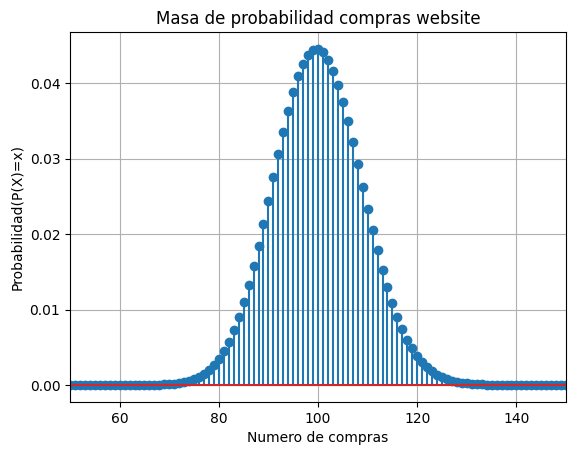

In [12]:
#Representar gráficamente la función de masa de la variable aleatoria e interpretar los resultados.
import numpy as np
import matplotlib.pyplot as plt 
x= np.arange(1,501,1)
masa_probabilidad_binomial = binom_website.pmf(x)


plt.stem(x,masa_probabilidad_binomial,markerfmt='o',linefmt='-')
plt.xlabel('Numero de compras')
plt.ylabel('Probabilidad(P(X)=x)')
plt.title('Masa de probabilidad compras website')
plt.xlim(50,150)
plt.grid()
plt.show()
#help(plt.plot)

R\ debido a que se tienen tantos valores en este caso, al dejar los 500 posibles valores que toma x, las lineas de masa de probabilidad se superponen y parece ser como si se tuviera una variable continua, cuando realmente es discreta, solo que al tener 500 puntos muestrales, es complejo representar cada uno en una linea independiente con espacio de las de su alrededor.

### Ejercicio 2

En una línea de producción de chips para ordenadores, se sabe que hay una probabilidad del 5% de que un chip sea defectuoso. Una máquina automática examina cada chip de manera secuencial, y la producción continúa hasta que se encuentra un chip defectuoso, momento en el cual la línea de producción se detiene para hacer ajustes y correcciones necesarias.

1. ¿Qué distribución de probabilidad consideramos en este caso? Tenéis que justificar el tipo de distribución y sus parámetros.

2. Calcular la probabilidad de que se necesiten probar $10$ chips para encontrar el primer chip defectuoso. 

3. Calcular las siguientes probabilidades $P(x≤4)$, $P(x=4)$, $P(x>4)$ y $P(x<4)$ e interpretar los resultados.
 
4. Generar una muestra de tamaño $1000$ de una distribución geométrica siendo $p=0.05$ y luego calcular las frecuencias relativas (`pd.Series().count_values(normalize=True)`) y compararlas con las probabilidades teóricas (`.pmf()`).

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

R\ En este caso consideraria una dist geometrica debido a que se tienen distintos eventos independientes con una probabilidad de exito/fracaso y lo que interesa es el numero de eventos hasta encontrar un exito. En este caso el 'exito' seria encontrar un chip defectuoso en ese caso se para la produccion. A pesar de ser contraintuitivo trabajaria asi este caso con una dist geometrica de parametro p= 0,05

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [13]:
#Calcular la probabilidad de que se necesiten probar 10 chips para encontrar el primer chip defectuoso.

from scipy.stats import geom

dist_geom_chips= geom(0.05)
prob_10_chips= dist_geom_chips.pmf(10)
print(f'la probabilidad de que se necesiten probar 10 chips antes del primer fracaso es: {prob_10_chips*100:.2f}%')

la probabilidad de que se necesiten probar 10 chips antes del primer fracaso es: 3.15%


R\ se usa pmf pq la funcion es discreta como se pide la probabilidad de exactemente de probar 10 chips para encontrar el primero defectuoso, quiere decir que el 10mo chip es el defectuoso, por lo cual se usa la pmf = 10.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [14]:
#P(X<=4)
prob_menor_igual_4= dist_geom_chips.cdf(4)
print(f'la probabilidad de que el primer chip defectuoso se encuentre en el 4to intento o antes es: {prob_menor_igual_4*100:.2f}%')

#P(X=4)
prob_igual_4= dist_geom_chips.pmf(4)
print(f'la probabilidad de que el primer chip defectuoso se encuentre exactamente en el 4to intento es: {prob_igual_4*100:.2f}%')

#P(X>4)
prob_mayor_4= 1-dist_geom_chips.cdf(4)
print(f'la probabilidad de que el primer chip defectuoso se encuentre en cualquier intento posterior del 4to intento es: {prob_mayor_4*100:.2f}%')


#P(X<)4
prob_menor_4= dist_geom_chips.cdf(3)
print(f'la probabilidad de que el primer chip defectuoso se encuentre en los alguno de los primeros 3 intentos es: {prob_menor_4*100:.2f}%')


la probabilidad de que el primer chip defectuoso se encuentre en el 4to intento o antes es: 18.55%
la probabilidad de que el primer chip defectuoso se encuentre exactamente en el 4to intento es: 4.29%
la probabilidad de que el primer chip defectuoso se encuentre en cualquier intento posterior del 4to intento es: 81.45%
la probabilidad de que el primer chip defectuoso se encuentre en los alguno de los primeros 3 intentos es: 14.26%


R\ en el unico caso q usamos pmf es cuando es igual a 4, de resto se usa cdf y se calculan las probabilidades descritas.


<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

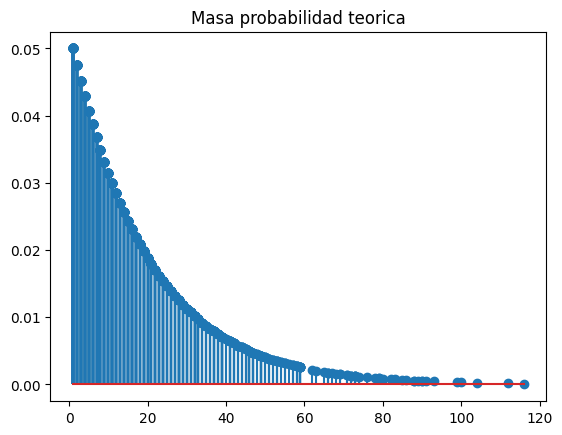

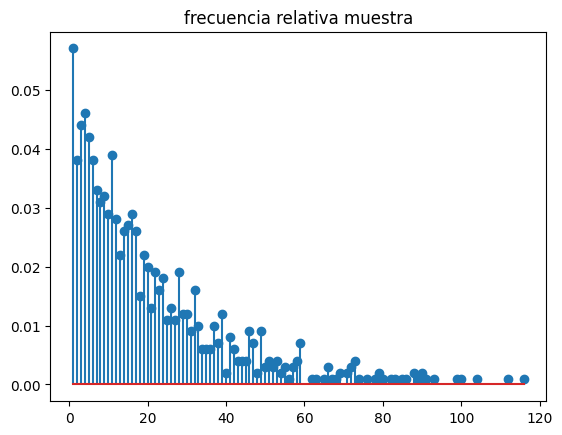

In [15]:
np.random.seed(1)
muestra_geom = dist_geom_chips.rvs(1000)
pmf_muestra_geom= dist_geom_chips.pmf(muestra_geom)
plt.subplot()
plt.stem(muestra_geom,pmf_muestra_geom,markerfmt='o')
plt.title('Masa probabilidad teorica')
plt.show()

Frec_relativa_muestra_geom= pd.Series(muestra_geom).value_counts(normalize=True)
plt.subplot
plt.stem(Frec_relativa_muestra_geom.index, Frec_relativa_muestra_geom, markerfmt='o')
plt.title('frecuencia relativa muestra')
plt.show()

R\ lo que podemos apreciar es que generando una muestra aleatoria que siga esa distribucion las frecuencias relativas que encontraremos seran similares a las probabilidades teoricas, ya que estas observaciones aleatorias estan siendo generadas a partir de esta dist geometrica especifica

### Ejercicio 3

Supongamos ahora que tenemos una cierta variable que sigue la distribución normal $x∼N(140,7)$. Se pide lo siguiente:

1. Calcular su función de densidad para $k=157$. 

2. Calcular los valores de la función de densidad sobre una secuencia de valores de k (utilizar $n=100$)

3. Representar gráficamente la función de densidad tomando los valores calculados en el paso $2$.

4. Calcular la probabilidad $P(X≤160)$ y la probabilidad $P(X>170)$

5. Calcular la probabilidad $P(150≤X≤170)$ e interpretar los resultados. 

6. Simular una muestra de dicha distribución normal ($n=10000$) y comprobar que el histograma es muy parecido a la función de densidad.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [16]:
from scipy.stats import norm

dist_normal_ejercicio3 = norm(140,7)
prob_norm_menor_157= dist_normal_ejercicio3.cdf(157)
print(f'La probabilidad de tener un valor menor a 157 teniendo en cuenta esta distribucion es: {prob_norm_menor_157*100:.2f}%')

dist_normal_ejercicio3.pdf(157)


La probabilidad de tener un valor menor a 157 teniendo en cuenta esta distribucion es: 99.24%


np.float64(0.002985977025112884)

R\ se crea la dist y se calcula la probabilidad para el valor dado, se usa la funcion acumulada pq la dist normal es continua. Se calcula la funcion de densidad, que da un valor de probabilidad aproximado de alrededor de 157.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [17]:
muestra_norm= dist_normal_ejercicio3.rvs(100)
pdf_muestra_norm= dist_normal_ejercicio3.pdf(muestra_norm)
for i,probabilidad in enumerate(pdf_muestra_norm):
    print(f'{muestra_norm[i]:.2f}:',probabilidad)
    if i == 5:
        break

145.08: 0.043802671977751916
137.73: 0.0540739421366355
145.70: 0.040908146769263784
145.46: 0.04202816299612574
129.75: 0.019514936828730425
138.92: 0.0563156703067918


Se calculan las probabilidades sobre la muestra generada, teniendo en cuenta que pdf no da un valor de probabilidad interpretable mas alla de inidicarnos la densidad de probabilidad alrededor de un valor infinitesimal de x.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

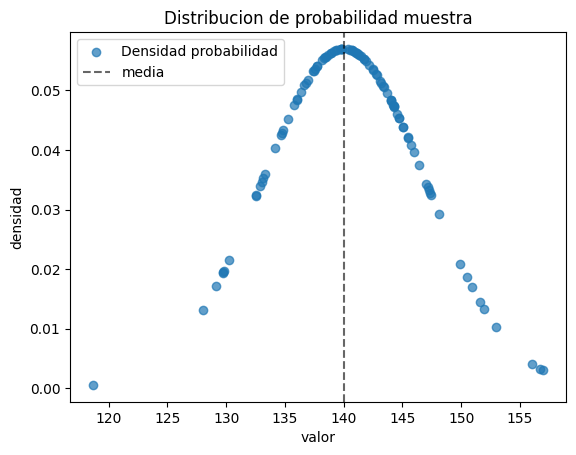

In [18]:
# Representar gráficamente la función de densidad tomando los valores calculados en el paso 2.abs

plt.scatter(muestra_norm,pdf_muestra_norm, alpha=0.7,label='Densidad probabilidad')
plt.title('Distribucion de probabilidad muestra')
plt.xlabel('valor')
plt.ylabel('densidad')
plt.axvline(140, color='black', linestyle= '--', alpha=0.6, label='media')
plt.legend()
plt.show()

R\ realice un scatter plot para graficar cada punto de probabilidad con su respectibo valor, y esto nos da una clara imagen de la dist normal teorica de la cual salieron los datos.

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [19]:
#P(X<=160)
prob_norm_menor_160= dist_normal_ejercicio3.cdf(160)
print(f'La probabilidad de tener un valor menor a 160 teniendo en cuenta esta distribucion es: {prob_norm_menor_160*100:.2f}%')
#P(X>170)
prob_normal_mayor_170= 1 -dist_normal_ejercicio3.cdf(170)
print(f'La probabilidad de tener un valor mayor a 170 teniendo en cuenta esta distribucion es: {prob_normal_mayor_170*100:.5f}%')

La probabilidad de tener un valor menor a 160 teniendo en cuenta esta distribucion es: 99.79%
La probabilidad de tener un valor mayor a 170 teniendo en cuenta esta distribucion es: 0.00091%


R\ se calculan las probabilidades usando cdf ya que la dist es continua y obtenemos que dada una normal de media 140 y desv estandar 7, la prob de tener un valor mayor a 170 es practicamente cero, lo cual tiene sentido, al igual que un valor menor a 160 sera lo mas normal de encontrar con casi total seguridad.

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

In [20]:
prob_respuesta= dist_normal_ejercicio3.cdf(170) -dist_normal_ejercicio3.cdf(150)
print(f'La probabilidad de tener un valor entre 150 y 170 teniendo en cuenta esta distribucion es: {prob_respuesta*100:.2f}%')

La probabilidad de tener un valor entre 150 y 170 teniendo en cuenta esta distribucion es: 7.66%


R\ calculamos la probabilidad acumulada de valores menores a 170 y luegp la de menores a 150. La diferencia entre estas sera el intervalo deseado.

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

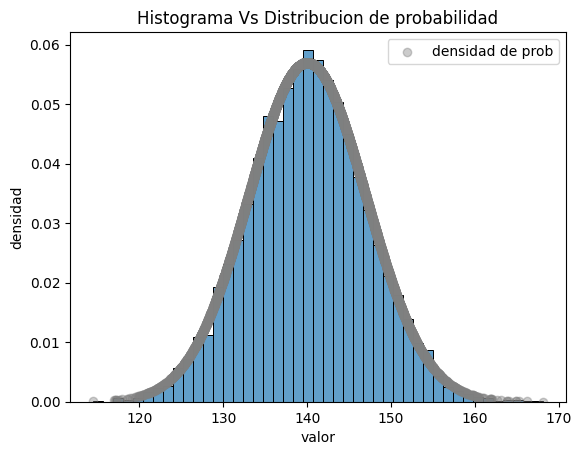

In [21]:
# Simular una muestra de dicha distribución normal y comprobar que el histograma es muy parecido a la función de densidad.
muestra_norm_2 = dist_normal_ejercicio3.rvs(10000)
densidad_muestra_2= dist_normal_ejercicio3.pdf(muestra_norm_2)
import seaborn as sns

sns.histplot(muestra_norm_2, bins= 45, stat='density',alpha=0.7)
plt.scatter(muestra_norm_2,densidad_muestra_2, color='grey', alpha=0.4, label='densidad de prob')
plt.title('Histograma Vs Distribucion de probabilidad')
plt.xlabel('valor')
plt.ylabel('densidad')
plt.legend()
plt.show()

R\ se crea el histogram y se pasa por encima la grafica de densidad anterior y se ve que el histograma se asemeja a la curva normal.lo que valida que los datos simulados siguen la distribución especificada.

### Ejercicio 4

Realizar los cálculos oportunos en los siguientes supuestos:

1. Sea $f$ la función de densidad de una variable aleatoria normal con $μ=0.2$ y $σ=1.2$. Dar el valor de $f(0.5)$ y justificar vuestra respuesta.

2. Sea $X$ una variable aleatoria normal con $μ=0.2$ y $σ=1.2$. Calcular la probabilidad de que $X$ tome un valor menor que 3 e interpretar los resultados.

3. Sea $X$ una variable aleatoria $B(10,0.2)$ (`binom`). Dar el valor de $P(3≤X≤7)$ y justificar vuestra respuesta.

4. Sea $Y$ una variable aleatoria que sigue una distribución exponencial (`expon`) con una tasa de $λ=0.5$. Calcular la probabilidad de que $Y$ sea menor o igual a $2$, y justificar la respuesta.

5. Sea $X$ una variable aleatoria normal con $μ=0.2$ y $σ=1.2$. Dar el valor de $P(3≤X≤7)$ y justificar vuestra respuesta.

6. Generar una muestra de $1000$ valores de una variable aleatoria que sigue una distribución de Poisson (`poisson`) con un parámetro de $λ=3$. Realizar un histograma de los valores generados y compara la distribución empírica con la teórica, justificando las similitudes o diferencias que observes.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [22]:
dist_normal_pto_4= norm(loc=0.2, scale= 1.2 )
dist_normal_pto_4.pdf(0.5)


np.float64(0.3222234306690411)

R\ Se calculo la función de densidad de probabilidad de acuerdo alo requerido. Debido a que es una distribución de probabilidad continua, la probabilidad de que x sea igual a un valor puntual es cero. Esta función mide la probabilidad relativa de observar el valor dado. 

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [30]:
# Probabilidad de X < 3
prob_less_3 = dist_normal_pto_4.cdf(3)
print(f'La probabilidad de que X tome un valor menor que 3 es {prob_less_3}')

La probabilidad de que X tome un valor menor que 3 es 0.9901846713713547


R\ Se calculó la probabilidad requerida utilizando la función de distribución acumulativa de la distribución normal. Esto representa la probabilidad de  obtener valores de la variable aleatoria que sean menores a 3.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [23]:
n= 10
p=0.2

bin_pto4 = binom(n=n, p=p)
prob_binom_respuesta= bin_pto4.cdf(7)- bin_pto4.cdf(2)
prob_binom_respuesta
                                                



np.float64(0.3221225472000002)

R\ Teniendo en cuenta que se nos pide un intervalo para una distribución de probabilidad discreta, calculamos las probabilidades acumuladas que sea menor o igual a 2 y que sea menor o igual a 7. De esta manera al restarle a la probabilidad acumulada hasta 7, la probabilidad acumulada hasta 2, tendriamos la probabilidad del intervalo deseado.

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [24]:
# lambda = 0.5, prob Y<=2

from scipy.stats import expon

dist_exp= expon(scale=1/0.5)
prob_exp= dist_exp.cdf(2)

prob_exp

np.float64(0.6321205588285577)

R\ Se calculó  la probabilidad usando la función de distribución acumulativa de la distribución exponencial. La probabilidad acumulada se interpreta como el tiempo que transcurre hasta que ocurre un evento bajo una tasa de ocurrencia labmda igual a 0.5

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

In [31]:
# Probabilidad de 3 ≤ X ≤ 7
prob_3_7_normal = dist_normal_pto_4.cdf(7) - dist_normal_pto_4.cdf(3)
print(f'La probabilidad del intervalo P(3 <= x <= 7) es {prob_3_7_normal}')

La probabilidad del intervalo P(3 <= x <= 7) es 0.009815321348535244


R\ en este caso calculamos la probabilidad para un intervalo pero de una variable continua, asi que en este caso incluimos el 3 en el intervalo inferior ya que la probabilidad en un punto es igual a 0. De estamanera obtenemos la proporción de valores de la variable normal que caen en el intervalo.

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

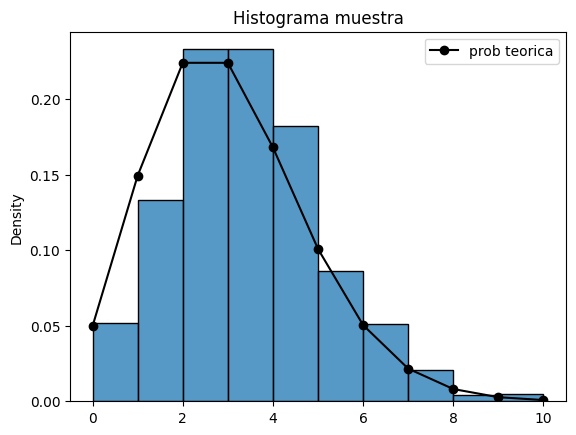

In [35]:
#Generar una muestra de 1000 valores de una variable aleatoria que sigue una distribución de Poisson (poisson) con un parámetro de 
# lambda= 3 Realizar un histograma de los valores generados y compara la distribución empírica con la teórica,
#justificando las similitudes o diferencias que observes.

from scipy.stats import poisson
dist_poisson_pto4= poisson(mu=3)

np.random.seed(3)
muestra_poisson= dist_poisson_pto4.rvs(1000)
prob_poisson= dist_poisson_pto4.pmf(muestra_geom)
muestra_teorica= np.arange(0,np.max(muestra_poisson)+1,1)
prob_poisson_teorica= dist_poisson_pto4.pmf(muestra_teorica)

sns.histplot(muestra_poisson, bins=10, stat='density')
plt.title('Histograma muestra')
plt.plot( muestra_teorica, prob_poisson_teorica, marker= 'o',color='black', label='prob teorica')
plt.legend()
plt.show()








R\Se generó una muestra de 1000 valores de una distribución de Poisson con lambda igual a 3. Se comparó el histograma de la muestra con las probabilidades teóricas obtenidas de la función de masa de Poisson. Ambas distribuciones son muy similares, lo que valida que los datos simulados siguen adecuadamente la distribución teórica.

### Ejercicio 5

Una fábrica de lámparas LED ha recibido un lote de $150$ LEDs de un proveedor $X$ y $250$ LEDs de un proveedor $Y$, haciendo un total de $400$ LEDs ($M$). Para el control de calidad, la empresa decide seleccionar una muestra de $5$ LEDs al azar sin reemplazo de los $400$ LEDs recibidos. Considerar que hay que modelar este problema por medio de una distribución hipergeométrica (`hypergeom`) con $n=150$ éxitos en la población (LEDs del proveedor $X$), $250$ fracasos en la población (LEDs del proveedor $Y$) y $N=5$ el tamaño de la muestra.

1. Calcular la probabilidad de que todos los $5$ LEDs en la muestra sean del proveedor $X$. 

2. Calcular la probabilidad de que tres o más de los LEDs sean del proveedor $X$.

3.  Generar una muestra de tamaño $1000$ de dicha distribución hipergeométrica. Calcular las frecuencias muestrales relativas y compararlas con las probabilidades teóricas.

In [26]:
# Los parámetros que tenéis que utilizar 
n = 150  # Número de éxitos en la población. 250 sería el número de fracasos en la población
N = 5    # Tamaño de la muestra
M = n + 250 # Tamaño total de la población (éxitos + fracasos)

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 05</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [27]:
from scipy.stats import hypergeom
M=400
n=150
N=5
dist_hypergeom_pto5 = hypergeom(M=M,n=n,N=N)
prob_5= dist_hypergeom_pto5.pmf(5)
print(f'la probablidad de tener todos 5 del lote x es: {prob_5*100:.2f}%')

la probablidad de tener todos 5 del lote x es: 0.71%


R\ Se calculó la probabilidad de que todos los LEDs seleccionados en la muestra sean del proveedor utilizando la función de masa de probabilidad de la distribución hipergeométrica.Esto representa la probabilidad de obtener 5 éxitos en una muestra de tamaño 5 tomada de una población con 150
 éxitos y 400 elementos en total.


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [28]:
prob_3_mas = 1-dist_hypergeom_pto5.cdf(2)
print(f'la probablidad de tener 3 o mas del lote x es: {prob_3_mas*100:.2f}%')

la probablidad de tener 3 o mas del lote x es: 27.42%


R\ Se calculó la probabilidad de que tres o más LEDs en la muestra sean del proveedor. Para esto calculamos la probabilidad acumulada hasta 2. Es decir que sean 2 o menos. Luego restamos uno menos esa probabilidad y obtenemos el complemento, que serpia tener el intervalo deseado.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

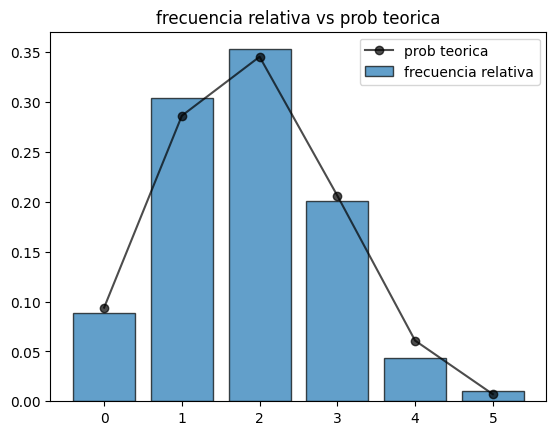

In [29]:
muestra_hypergeom= dist_hypergeom_pto5.rvs(1000)
frec_relativa= pd.Series(muestra_hypergeom).value_counts(normalize=True)

muestra_teorica= np.arange(0,6,1)
prob_teorica= dist_hypergeom_pto5.pmf(muestra_teorica)

plt.bar(frec_relativa.index, frec_relativa, edgecolor='black', alpha=0.7, label='frecuencia relativa')
plt.title('frecuencia relativa vs prob teorica')
plt.plot(muestra_teorica, prob_teorica, color='black',marker='o', alpha=0.7, label='prob teorica')
plt.legend()
plt.show()

R\ Se compararon las frecuencias muestrales relativas, obtenidas de la muestra simulada, con las probabilidades teóricas de la distribución hipergeométrica. La gráfica muestra una alta similitud entre ambas, validando que la muestra generada sigue el comportamiento esperado de la distribución.

### Ejercicio 6 

Imaginemos que un inversor tiene una cartera compuesta exclusivamente por acciones de una empresa específica. Basándonos en datos históricos, sabemos que la probabilidad de que el valor de estas acciones aumente en un día específico es de $0.5$ $(50\%)$. El inversor planea mantener estas acciones durante $100$ días. Definamos una variable aleatoria $X$ que represente el número de días que las acciones incrementan su valor durante estos $100$ días.

1. ¿Qué distribución de probabilidad sigue la variable aleatoria $X$? Proporciona el tipo de distribución y sus parámetros.

2. ¿Cuál es la probabilidad de que el valor de las acciones aumente exactamente $50$ veces en los $100$ días? 

3. ¿Cuál es la probabilidad de que el valor de las acciones aumente más de $50$ veces en los $100$ días? 

4. ¿Cuál es la probabilidad de que el valor de las acciones aumente menos de $50$ veces en los $100$ días? 

5. Representar gráficamente la función de masa y distribución de la variable aleatoria $X$ e interpretar los resultados.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 06</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

R\ Se estableció que la variable aleatoria sigue una distribución binomial porque modela el número de éxitos en un número fijo de ensayos, donde los ensayos son independientes y tienen una probabilidad constante de éxito.


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [36]:
from scipy.stats import binom


n = 100
p = 0.5
binom_punto_6 = binom(n=n, p=p)

# Probabilidad de X = 50
prob_x_50 = binom_punto_6.pmf(50)
print(f'La probabilidad de que el valor de las acciones aumente exactamente 50 veces en los 100 días es de: {prob_x_50}')

La probabilidad de que el valor de las acciones aumente exactamente 50 veces en los 100 días es de: 0.07958923738717875


R\ Para calcular la probabilidad de que sea exactamente 50 días en los que la acción aumente, debemos usar la función de masa de probabilidad ya que tenemos una variable con distribución discreta, binomial en este caso y nos interesa la probabilidad de un valor puntual.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [38]:
# Probabilidad de X > 50
prob_mas_50 = 1 - binom_punto_6.cdf(50)
print(f'La probabilidad de que el valor de las acciones aumente más de 50 veces en los 100 días es de: {prob_mas_50}')

La probabilidad de que el valor de las acciones aumente más de 50 veces en los 100 días es de: 0.46020538130641053


R\ Para este caso si usamos la acumulada ya que necesitamos la probabilidad de que aumente en mas de 50 días, es decir que aumente entre 51 y 100 días. Al tener una proabilidad de exito de 0.5 en cada evento bernoulli que compone la binomial, observamos que no es casualidad que sea cercano al 50% de probabilidad tener la mitad de eventos del espacio muestral que incluye el intervalo requerido.

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [39]:
# Probabilidad de X < 50
prob_x_menos50 = binom_punto_6.cdf(49)
print(f'La probabilidad de que el valor de las acciones aumente menos de50 veces en los 100 días es de: {prob_x_menos50}')

La probabilidad de que el valor de las acciones aumente menos de50 veces en los 100 días es de: 0.46020538130641053


R\ De la misma manera que en el apartado anterior usamos la acumulada y vemos que tenemos exactamente el mismo valor de proabilidad para la otra mitad del espacio muestral y tambien es cercana a 50% la probabilidad. EL valor de probabilidad es igual debido a la simetría de la distribución binomial cuando la probabilidad de exito es 0.5, en este caso la dist binomial esta centrada en la media igual a 50 y es simetrica alrededor de ese punto.

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

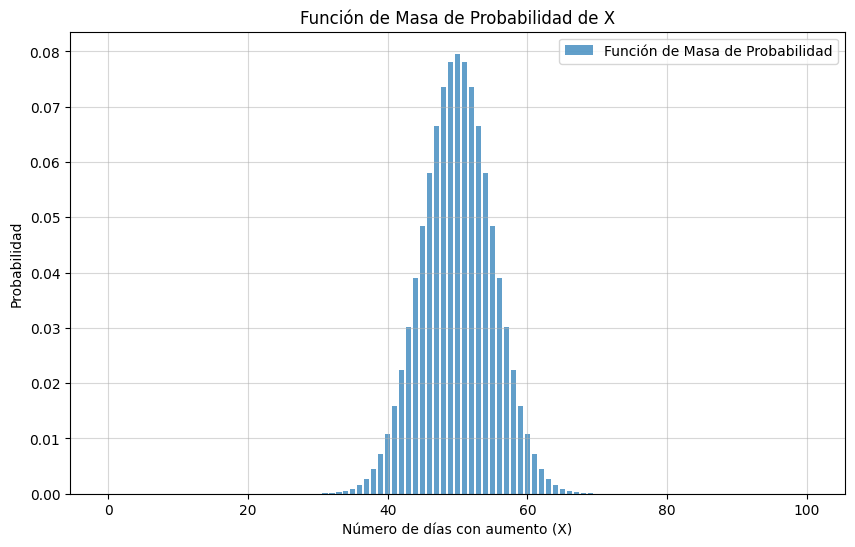

In [41]:
# Valores posibles de la variable aleatoria x
x_values = np.arange(0, n + 1)

# Función de masa de probabilidad
pmf_values = binom_punto_6.pmf(x_values)

# Gráfica
plt.figure(figsize=(10, 6))
plt.bar(x_values, pmf_values, alpha=0.7, label="Función de Masa de Probabilidad")
plt.title("Función de Masa de Probabilidad de X")
plt.xlabel("Número de días con aumento (X)")
plt.ylabel("Probabilidad")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

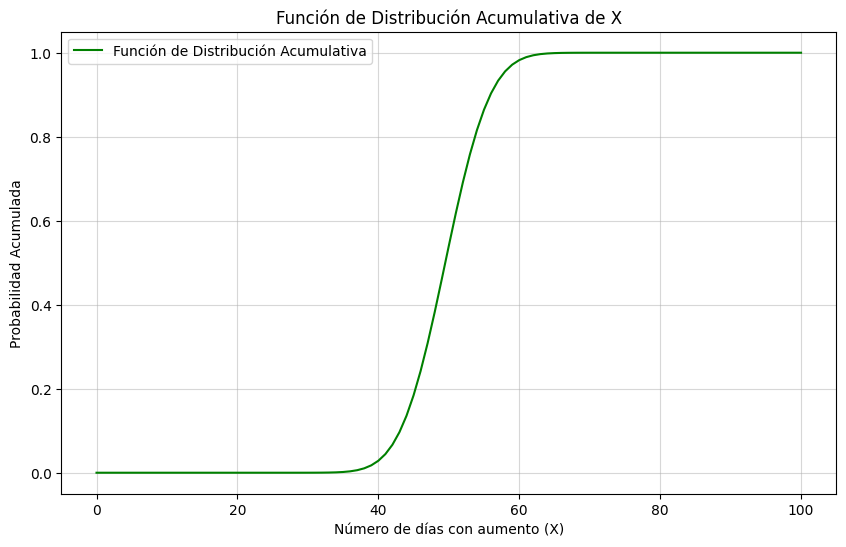

In [43]:
# Función de distribución acumulativa
cdf_values = binom_punto_6.cdf(x_values)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x_values, cdf_values, label="Función de Distribución Acumulativa", color="green")
plt.title("Función de Distribución Acumulativa de X")
plt.xlabel("Número de días con aumento (X)")
plt.ylabel("Probabilidad Acumulada")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

R\ Se representaron gráficamente la función de masa de probabilidad y la función de distribución acumulativa para la variable aleatoria con distribución binomial trabajada. La función de masa muestra una distribución simétrica con un máximo alrededor de $X = 50$, que es el valor esperado. La función de distribución acumulativa indica cómo las probabilidades se acumulan progresivamente, alcanzando 1 a medida que $X$ se aproxima al total de días, tambien nos permite ver que el grueso de la probabilidad esta entre 40 y 60, lo cual tiene sentido teniendo 100 intentos en total y una proabilidad de exito de 0.5

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>